/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46015 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:42495
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:46015/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38221'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33111'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:42341', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:42341
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:40418
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:40929', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker

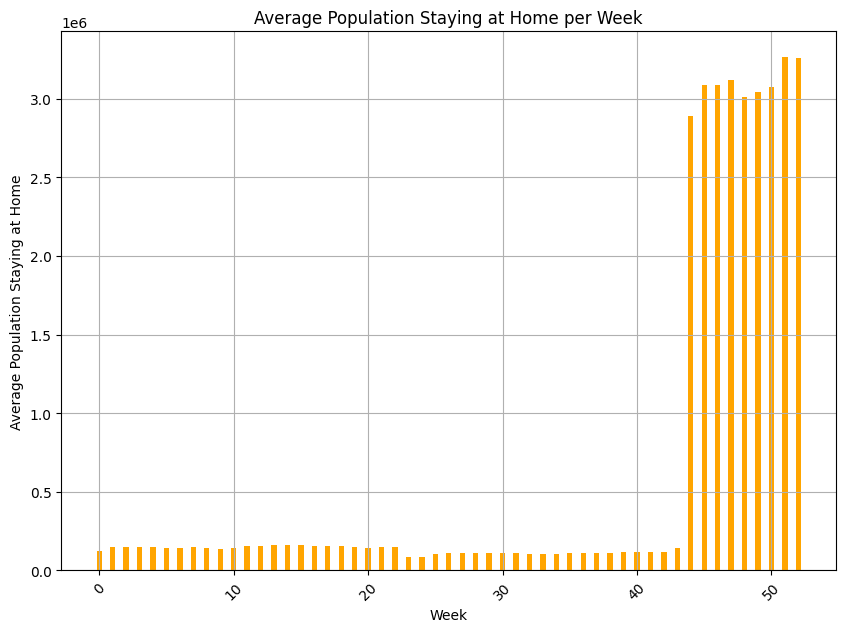

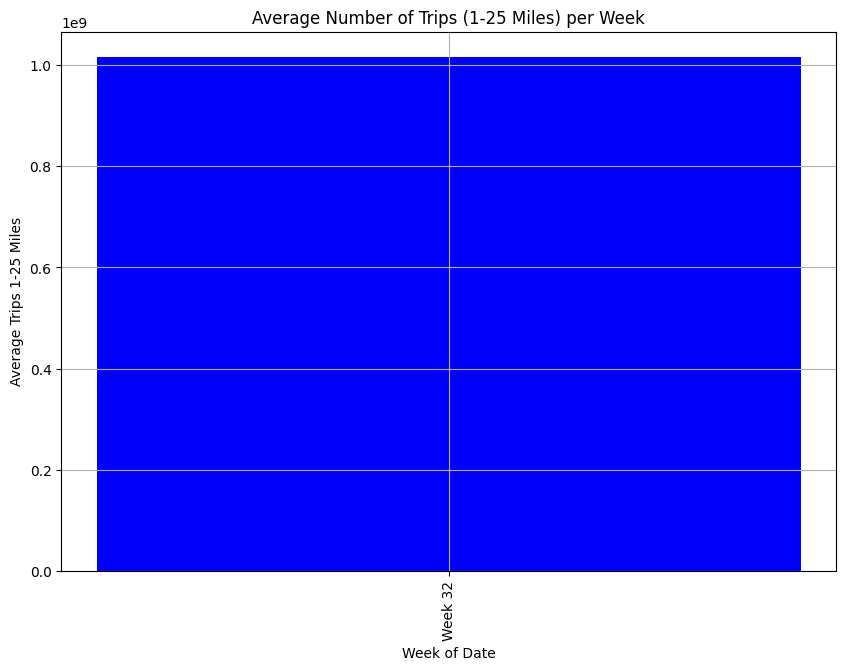

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38221'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:33111'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40418; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:42341', name: 0, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712805232.624435')
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:40426; closing.
INFO:distributed.scheduler:Remove worker <WorkerState 'tcp://127.0.0.1:40929', name: 1, status: closing, memory: 0, processing: 0> (stimulus_id='handle-worker-cleanup-1712805232.6581295')
INFO:distributed.scheduler:Lost all workers
INFO:distributed.scheduler:Scheduler closing due to unknown reason...
INFO:distributed.scheduler:Sc

In [7]:
import dask.dataframe as dd
from dask.distributed import Client
import matplotlib.pyplot as plt

# Initialize the Dask client for parallel computation
client = Client()

# Specify data types for the columns to handle data loading correctly
dtype_dict = {
    'County Name': 'object',
    'State Postal Code': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64',
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'Week': 'float64',  # Ensure this column exists in 'Trips_by_Distance.csv'
    'Month': 'float64',  # Adjust if necessary
}

# Load the datasets into Dask DataFrames with specified data types
df = dd.read_csv('/content/Trips_by_Distance.csv', dtype=dtype_dict)
df_full = dd.read_csv('/content/Trips_Full Data.csv', dtype=dtype_dict)

# Count unique weeks in the 'Trips_by_Distance.csv' dataset
unique_weeks = df['Week'].nunique().compute()

# Calculate the mean population staying at home per week
avg_pop_staying_home = df.groupby('Week')['Population Staying at Home'].mean().compute()

# For 'Trips_Full_Data.csv', use 'Week of Date' for grouping
# First, adjust the dtype_dict to ensure 'Week of Date' is correctly typed if it's missing
unique_weeks_full = df_full['Week of Date'].nunique().compute()

# Calculate the mean trips of 1-25 miles per week
avg_trips_1_25 = df_full.groupby('Week of Date')['Trips 1-25 Miles'].mean().compute()

# Visualization for the population staying at home
plt.figure(figsize=(10, 7))
plt.bar(avg_pop_staying_home.index, avg_pop_staying_home.values, color='orange', width=0.4)
plt.xlabel("Week")
plt.ylabel("Average Population Staying at Home")
plt.title("Average Population Staying at Home per Week")
plt.xticks(rotation=45)  # Adjust rotation for better readability
plt.grid(True)
plt.show()

# Visualization for the number of trips (1-25 miles)
plt.figure(figsize=(10, 7))
plt.bar(avg_trips_1_25.index, avg_trips_1_25.values, color='blue', width=0.4)
plt.xlabel("Week of Date")
plt.ylabel("Average Trips 1-25 Miles")
plt.title("Average Number of Trips (1-25 Miles) per Week")
plt.xticks(rotation=90)  # Adjust rotation due to possibly many unique weeks
plt.grid(True)
plt.show()

# Shutdown the Dask client to free resources
client.shutdown()


In [6]:
import pandas as pd

# Check the first few rows of the CSV file to confirm the column names
df_temp = pd.read_csv('/content/Trips_by_Distance.csv', nrows=5)
print(df_temp.columns)

df_temp_full = pd.read_csv('/content/Trips_Full Data.csv', nrows=5)
print(df_temp_full.columns)


Index(['Level', 'Date', 'State FIPS', 'State Postal Code', 'County FIPS',
       'County Name', 'Population Staying at Home',
       'Population Not Staying at Home', 'Number of Trips',
       'Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',
       'Number of Trips 5-10', 'Number of Trips 10-25',
       'Number of Trips 25-50', 'Number of Trips 50-100',
       'Number of Trips 100-250', 'Number of Trips 250-500',
       'Number of Trips >=500', 'Row ID', 'Week', 'Month'],
      dtype='object')
Index(['Month of Date', 'Week of Date', 'Year of Date', 'Level', 'Date',
       'Week Ending Date', 'Trips <1 Mile', 'People Not Staying at Home',
       'Population Staying at Home', 'Trips', 'Trips 1-25 Miles',
       'Trips 1-3 Miles', 'Trips 10-25 Miles', 'Trips 100-250 Miles',
       'Trips 100+ Miles', 'Trips 25-100 Miles', 'Trips 25-50 Miles',
       'Trips 250-500 Miles', 'Trips 3-5 Miles', 'Trips 5-10 Miles',
       'Trips 50-100 Miles', 'Trips 500+ Miles'],
      dtyp